# Time Series Forcasting


In [1]:
# import Libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
# Data Loading 

df = pd.read_csv('.csv')
df_test = pd.read_csv('Data/DailyDelhiClimateTest.csv')

In [4]:
df.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


In [16]:
df_test.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333


In [5]:
df=df[['date','meantemp']]

In [6]:
df=df.rename(columns={'date':'ds','meantemp':'y'})

In [8]:
pd.to_datetime(df.ds)

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
1461   2017-01-01
Name: ds, Length: 1462, dtype: datetime64[ns]

In [9]:
# Delete the last row (2017-01-01)
df = df[:-1]

15:10:04 - cmdstanpy - INFO - Chain [1] start processing
15:10:04 - cmdstanpy - INFO - Chain [1] done processing
d:\Machine Learning Projects\PSCACrimAnalysis\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Machine Learning Projects\PSCACrimAnalysis\venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
d:\Machine Learning Projects\PSCACrimAnalysis\venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior 

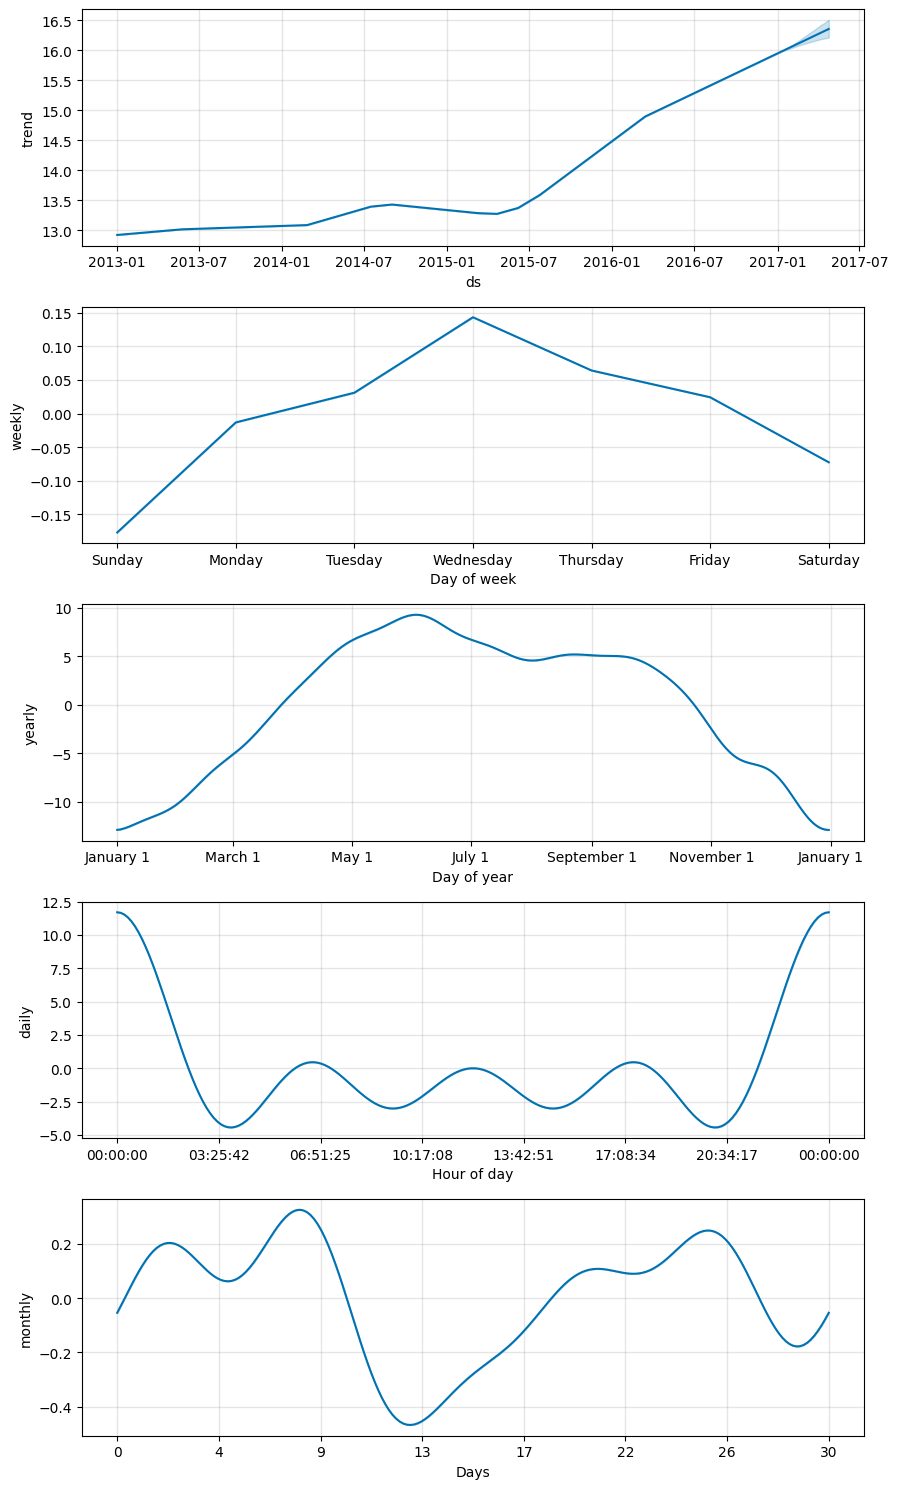

In [12]:
# Initialize model
m = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,daily_seasonality=True)

# Add monthly seasonality to the model
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

# Fit the model with training data and make prediction
m.fit(df)
future = m.make_future_dataframe(periods=114)
forecast = m.predict(future)
fig = m.plot_components(forecast)

d:\Machine Learning Projects\PSCACrimAnalysis\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Machine Learning Projects\PSCACrimAnalysis\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


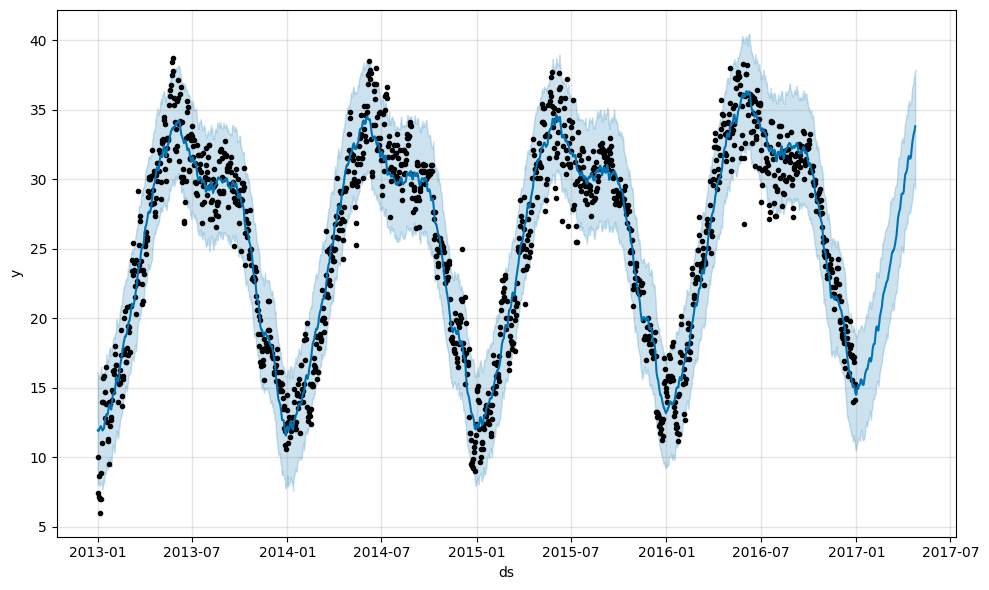

In [13]:
figure = m.plot(forecast)

In [14]:
plot_plotly(m, forecast)

In [17]:
plot_components_plotly(m,forecast)

In [15]:
from sklearn.metrics import r2_score
y_true = df_test.meantemp
y_pred = forecast.yhat.tail(114)
r2_score(y_true, y_pred)

0.8146032255555289

In [15]:
df = pd.read_csv(r"Categories\MOTORCYCLE THEFT.csv",parse_dates=['report_date'],index=False)

TypeError: read_csv() got an unexpected keyword argument 'index'

In [8]:
df.shape

(100662, 15)

In [9]:
# Data from 1-01-2022 till 8-03-2024
df = df[df['report_date'] <= '2023-07-01']

In [10]:
df.shape

(83915, 15)

In [11]:
grouped_df = df.groupby(['report_date']).size().reset_index(name='CrimeCount')

In [12]:
grouped_df

,report_date,CrimeCount
0,2019-01-01,34
1,2019-01-02,32
2,2019-01-03,29
3,2019-01-04,43
4,2019-01-05,25
...,...,...
1206,2022-04-22,169
1207,2022-04-23,83
1208,2022-04-24,120
1209,2022-04-25,127


## Train Test Split

### Prophet just needs two columns with specific names: ‘ds’ and ‘y’

In [36]:
grouped_df.columns

Index(['ds', 'y'], dtype='object')

In [37]:
# Calculate the IQR
Q1 = grouped_df['y'].quantile(0.25)
Q3 = grouped_df['y'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = grouped_df[(grouped_df['y'] < lower_bound) | (grouped_df['y'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
             ds    y
1206 2022-04-22  169


In [38]:
mean_value = grouped_df['y'].mean()
grouped_df.loc[(grouped_df['y'] < lower_bound) | (grouped_df['y'] > upper_bound), 'y'] = mean_value

grouped_df.head()

C:\Users\Dell Precision\AppData\Local\Temp\ipykernel_14472\4192720299.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.29397192402973' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped_df.loc[(grouped_df['y'] < lower_bound) | (grouped_df['y'] > upper_bound), 'y'] = mean_value


,ds,y
0,2019-01-01,34.0
1,2019-01-02,32.0
2,2019-01-03,29.0
3,2019-01-04,43.0
4,2019-01-05,25.0


In [39]:
grouped_df=grouped_df.rename(columns={'report_date':'ds','CrimeCount':'y'})

train_df = grouped_df.iloc[:1185]
test_df = grouped_df.iloc[1185:]
train_df.shape,test_df.shape 

((1185, 2), (26, 2))

In [14]:
df.columns

Index(['Unnamed: 0', 'report_date', 'report_time', 'location', 'category',
       'sub_category', 'x_cord', 'y_cord', 'ps_division', 'ps_station', 'year',
       'month', 'shift', 'case_id', 'contact_no'],
      dtype='object')

In [16]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [40]:
model = Prophet()
model.fit(train_df)

13:58:11 - cmdstanpy - INFO - Chain [1] start processing
13:58:11 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
# Predict on training set with model
test_data_fcst = model.predict(df=test_df)

In [42]:
test_df.head()

,ds,y
1185,2022-04-01,98.0
1186,2022-04-02,142.0
1187,2022-04-03,93.0
1188,2022-04-04,107.0
1189,2022-04-05,95.0


In [43]:
test_data_fcst.shape

(26, 19)

In [44]:
test_data_fcst['test_df'] = test_df['y']

In [45]:
test_data_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,test_df
0,2022-04-01,96.589969,80.369111,118.541787,96.589969,96.589969,2.466712,2.466712,2.466712,2.634126,2.634126,2.634126,-0.167414,-0.167414,-0.167414,0.0,0.0,0.0,99.056682,NaN
1,2022-04-02,96.606886,78.286354,113.981324,96.606886,96.606886,-0.438515,-0.438515,-0.438515,0.293889,0.293889,0.293889,-0.732404,-0.732404,-0.732404,0.0,0.0,0.0,96.168372,NaN
2,2022-04-03,96.623803,78.690845,115.101258,96.623803,96.623803,0.791246,0.791246,0.791246,2.049011,2.049011,2.049011,-1.257765,-1.257765,-1.257765,0.0,0.0,0.0,97.415049,NaN
3,2022-04-04,96.640720,76.558343,114.218666,96.640720,96.640720,-1.863355,-1.863355,-1.863355,-0.124210,-0.124210,-0.124210,-1.739145,-1.739145,-1.739145,0.0,0.0,0.0,94.777364,NaN
4,2022-04-05,96.657636,73.864941,111.032328,96.657636,96.657636,-4.562670,-4.562670,-4.562670,-2.389442,-2.389442,-2.389442,-2.173229,-2.173229,-2.173229,0.0,0.0,0.0,92.094966,NaN


In [46]:
test_data_fcst.drop(columns=['test_df'],axis=1,inplace=True)

In [47]:
test_df.head()

,ds,y
1185,2022-04-01,98.0
1186,2022-04-02,142.0
1187,2022-04-03,93.0
1188,2022-04-04,107.0
1189,2022-04-05,95.0


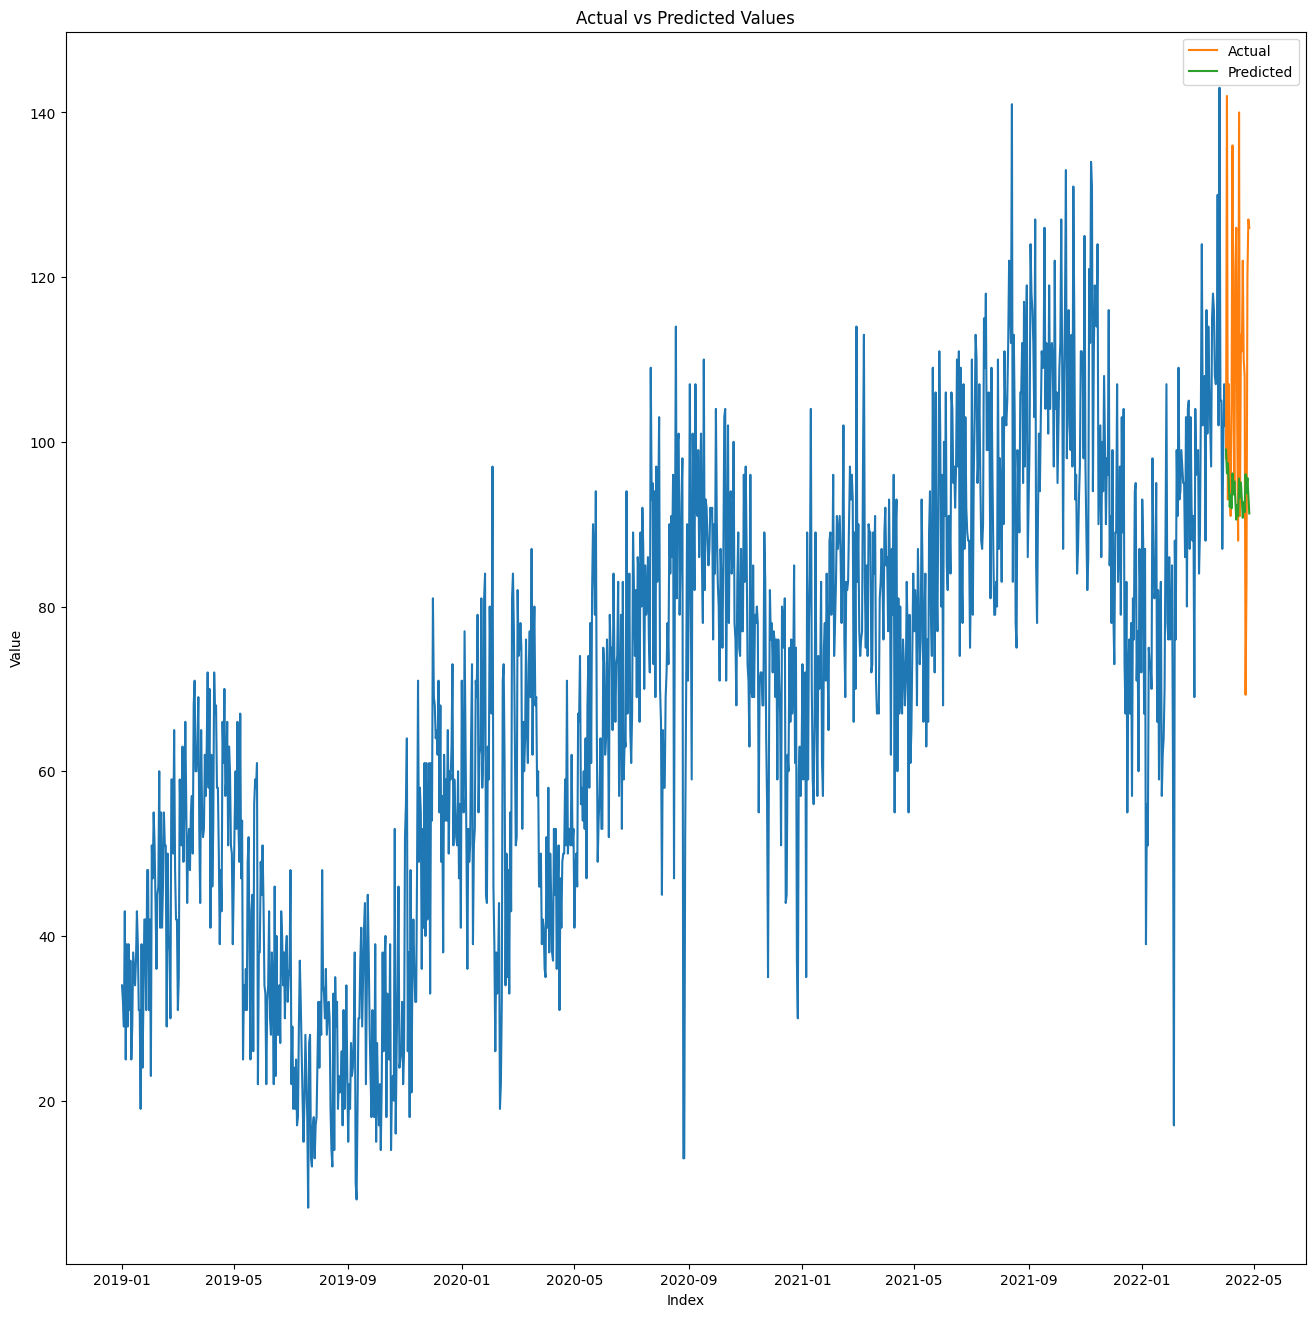

In [48]:
plt.figure(figsize=(16,16))
plt.plot(train_df['ds'],train_df['y'])
plt.plot(test_df['ds'],test_df['y'], label='Actual')

# Plotting the predicted values
plt.plot(test_data_fcst['ds'],test_data_fcst['yhat'], label='Predicted')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()

# Displaying the plot
plt.show()

<Axes: xlabel='yhat'>

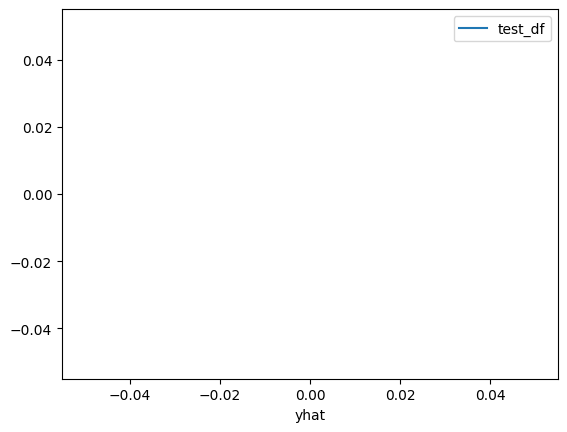

In [22]:
test_data_fcst.plot(x='yhat',y='test_df')

14:01:03 - cmdstanpy - INFO - Chain [1] start processing
14:01:03 - cmdstanpy - INFO - Chain [1] done processing
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\pl

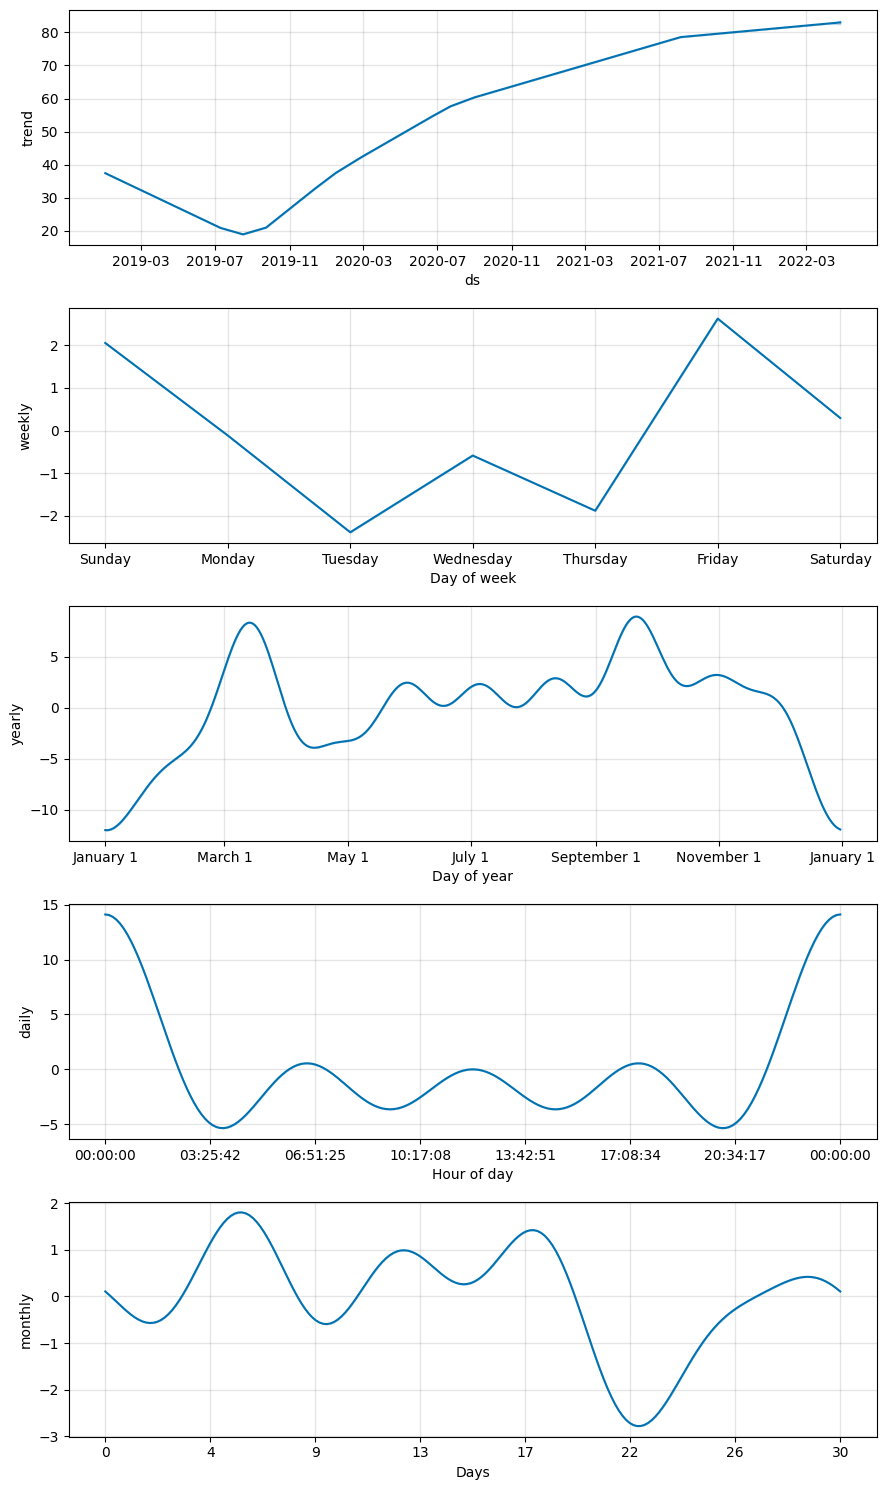

In [49]:
# Initialize model
m = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,daily_seasonality=True)
# Add monthly seasonality to the model
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
# Fit the model with training data and make prediction
m.fit(train_df)
future = m.make_future_dataframe(periods=26)
forecast = m.predict(future)
fig = m.plot_components(forecast)

e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


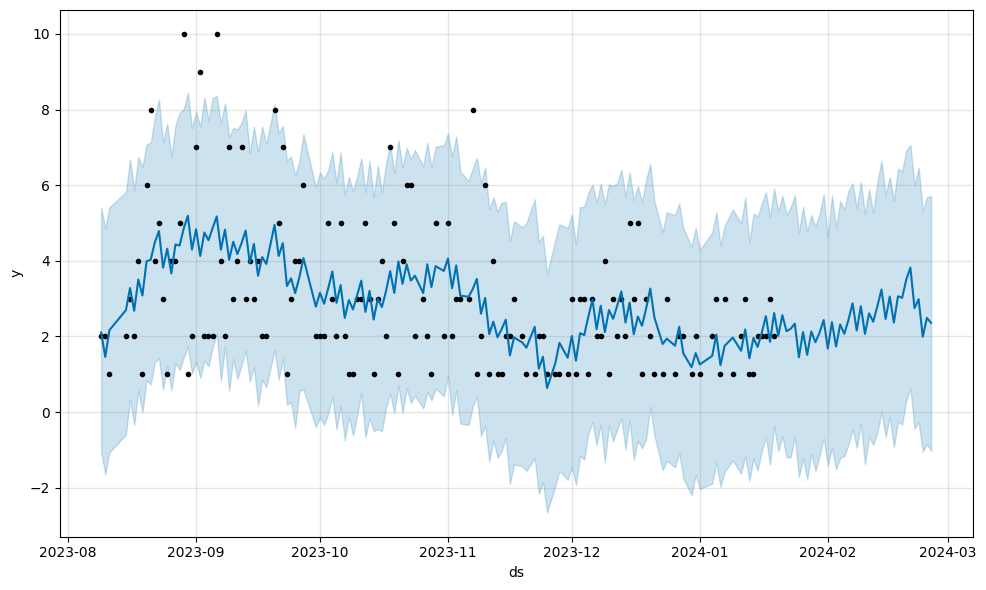

In [17]:
figure = m.plot(forecast)

In [50]:
plot_plotly(m, forecast)

NameError: name 'go' is not defined

In [12]:
plot_components_plotly(m,forecast)